In [1]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
Account_Segment=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Account_Segment.txt')
Beh_Seg_Lookup=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Beh_Seg_Lookup.txt')
Eng_Seg_Lookup=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Eng_Seg_Lookup.txt')
Cluster_Lookup=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Cluster_Lookup.txt')
Demographic_Vars=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Demographic_Vars.txt')
Customer_Account_Details=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Customer_Account_Details.txt')
Transaction_Fact=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Transaction_Fact.txt')
Campaign_Vars=pd.read_csv('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\Campaign_Vars.txt')

In [3]:
Transaction_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398668 entries, 0 to 398667
Data columns (total 8 columns):
Cust_id    398668 non-null int64
mth_id     398668 non-null int64
TPV        398668 non-null float64
TXN        398668 non-null int64
FMX_CC     398668 non-null float64
FMX_BC     398668 non-null float64
FMX_ACH    398668 non-null float64
FMX_BAL    398668 non-null float64
dtypes: float64(5), int64(3)
memory usage: 27.4 MB


In [4]:
def mnthsel(mnth):
    if 1359<=mnth and mnth<=1364:
        return 1
    elif 1365<=mnth and mnth<=1370:
        return 2
    else:
        return None
ds1=Transaction_Fact
ds1['TimeInt']=pd.Series([mnthsel(mnth) for mnth in ds1['mth_id']],index=ds1.index)
ds1_Fsix=ds1[ds1['TimeInt']==1]
ds1_Lsix=ds1[ds1['TimeInt']==2]
ds1_Fsix_G=ds1_Fsix.groupby('Cust_id').sum()
ds1_Fsix_G['Cust_id']=ds1_Fsix_G.index
ds1_Lsix_G=ds1_Lsix.groupby('Cust_id').sum()
ds1_Lsix_G['Cust_id']=ds1_Lsix_G.index
ds1_Twelve_G=ds1.groupby('Cust_id').sum()
ds1_Twelve_G['Cust_id']=ds1_Twelve_G.index
ds2=pd.merge(Account_Segment,Customer_Account_Details,how='left',on='Cust_id')
ds3=pd.merge(ds2,Demographic_Vars,how='left',on='Cust_id')
ds4=pd.merge(ds3,Campaign_Vars,how='left',on='Cust_id')









In [5]:
ds5=pd.merge(ds4,ds1_Lsix_G,how='left',on='Cust_id')
ds6=pd.merge(ds5,ds1_Twelve_G,how='left',on='Cust_id')
ds6.info()
ds7=ds6.drop(ds6.columns[[18,25,26,33]], axis=1)
ds7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 74999
Data columns (total 34 columns):
Cust_id                  75000 non-null int64
cust_engagmnt_seg_key    75000 non-null int64
Acquisition_channel      75000 non-null object
bhvrl_seg_type_key       75000 non-null int64
activity_segment         75000 non-null object
clstr_num                75000 non-null object
engaged_byr_y_n          75000 non-null object
CC_Added_Date            75000 non-null object
Bank_Added_date          75000 non-null object
PREPAID_Y_N              75000 non-null int64
age_cd                   75000 non-null int64
gender                   75000 non-null object
mtl_sts_cd               75000 non-null object
income_cd                75000 non-null int64
emailable_flag           75000 non-null int64
Email_open_y_n_3m        75000 non-null int64
Email_open_y_n_6m        75000 non-null int64
Email_open_y_n_12m       75000 non-null int64
mth_id_x                 62064 non-null float64
TPV_x  

In [6]:
for i in range(18,30):
    print i
    print ds7.columns[i]
    print type(ds7[ds7.columns[i]].isnull())
    ds7.loc[ds7[ds7.columns[i]].isnull(),ds7.columns[i]]=0



18
TPV_x
<class 'pandas.core.series.Series'>
19
TXN_x
<class 'pandas.core.series.Series'>
20
FMX_CC_x
<class 'pandas.core.series.Series'>
21
FMX_BC_x
<class 'pandas.core.series.Series'>
22
FMX_ACH_x
<class 'pandas.core.series.Series'>
23
FMX_BAL_x
<class 'pandas.core.series.Series'>
24
TPV_y
<class 'pandas.core.series.Series'>
25
TXN_y
<class 'pandas.core.series.Series'>
26
FMX_CC_y
<class 'pandas.core.series.Series'>
27
FMX_BC_y
<class 'pandas.core.series.Series'>
28
FMX_ACH_y
<class 'pandas.core.series.Series'>
29
FMX_BAL_y
<class 'pandas.core.series.Series'>


In [7]:
ds7['CC_Added']=1
ds7.loc[ds7['CC_Added_Date'].isin(['12/31/1969']),'CC_Added']=0
ds7['Bank_Added']=1
ds7.loc[ds7['Bank_Added_date'].isin(['12/31/1969']),'Bank_Added']=0
ds7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 74999
Data columns (total 32 columns):
Cust_id                  75000 non-null int64
cust_engagmnt_seg_key    75000 non-null int64
Acquisition_channel      75000 non-null object
bhvrl_seg_type_key       75000 non-null int64
activity_segment         75000 non-null object
clstr_num                75000 non-null object
engaged_byr_y_n          75000 non-null object
CC_Added_Date            75000 non-null object
Bank_Added_date          75000 non-null object
PREPAID_Y_N              75000 non-null int64
age_cd                   75000 non-null int64
gender                   75000 non-null object
mtl_sts_cd               75000 non-null object
income_cd                75000 non-null int64
emailable_flag           75000 non-null int64
Email_open_y_n_3m        75000 non-null int64
Email_open_y_n_6m        75000 non-null int64
Email_open_y_n_12m       75000 non-null int64
TPV_x                    75000 non-null float64
TXN_x  

In [8]:
ds7.info()
ds8=ds7.drop(ds7.columns[[7,8]], axis=1)
ds8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 74999
Data columns (total 32 columns):
Cust_id                  75000 non-null int64
cust_engagmnt_seg_key    75000 non-null int64
Acquisition_channel      75000 non-null object
bhvrl_seg_type_key       75000 non-null int64
activity_segment         75000 non-null object
clstr_num                75000 non-null object
engaged_byr_y_n          75000 non-null object
CC_Added_Date            75000 non-null object
Bank_Added_date          75000 non-null object
PREPAID_Y_N              75000 non-null int64
age_cd                   75000 non-null int64
gender                   75000 non-null object
mtl_sts_cd               75000 non-null object
income_cd                75000 non-null int64
emailable_flag           75000 non-null int64
Email_open_y_n_3m        75000 non-null int64
Email_open_y_n_6m        75000 non-null int64
Email_open_y_n_12m       75000 non-null int64
TPV_x                    75000 non-null float64
TXN_x  

In [9]:
print ds8.groupby(['cust_engagmnt_seg_key','PREPAID_Y_N']).size()
print ds8.groupby(['cust_engagmnt_seg_key','PREPAID_Y_N']).size()
print ds8.groupby(['bhvrl_seg_type_key','PREPAID_Y_N']).size()
print ds8.groupby(['activity_segment','PREPAID_Y_N']).size()
print ds8.groupby(['clstr_num','PREPAID_Y_N']).size()
print ds8.groupby(['engaged_byr_y_n','PREPAID_Y_N']).size()
print ds8.groupby(['age_cd','PREPAID_Y_N']).size()
print ds8.groupby(['gender','PREPAID_Y_N']).size()
print ds8.groupby(['mtl_sts_cd','PREPAID_Y_N']).size()
print ds8.groupby(['income_cd','PREPAID_Y_N']).size()
print ds8.groupby(['emailable_flag','PREPAID_Y_N']).size()
print ds8.groupby(['Email_open_y_n_3m','PREPAID_Y_N']).size()
print ds8.groupby(['Email_open_y_n_6m','PREPAID_Y_N']).size()
print ds8.groupby(['Email_open_y_n_12m','PREPAID_Y_N']).size()
print ds8.groupby(['CC_Added','PREPAID_Y_N']).size()
print ds8.groupby(['Bank_Added','PREPAID_Y_N']).size()
print ds8.groupby(['PREPAID_Y_N']).size()



cust_engagmnt_seg_key  PREPAID_Y_N
-98                    0                  2
                       1                  1
 5                     0               9871
                       1               1524
 6                     0              12537
                       1               2575
 7                     0              13794
                       1               3223
 8                     0               9494
                       1               2415
 9                     0               6787
                       1               2139
 10                    0               3562
                       1               1464
 11                    0               1447
                       1                911
 12                    0               2530
                       1                724
dtype: int64
cust_engagmnt_seg_key  PREPAID_Y_N
-98                    0                  2
                       1                  1
 5                     0             

In [10]:
ds9=ds8
print ds9.groupby(['cust_engagmnt_seg_key']).size()
ds9=ds9[~ds9['cust_engagmnt_seg_key'].isin([-98])]
print ds9.groupby(['cust_engagmnt_seg_key']).size()

cust_engagmnt_seg_key
-98        3
 5     11395
 6     15112
 7     17017
 8     11909
 9      8926
 10     5026
 11     2358
 12     3254
dtype: int64
cust_engagmnt_seg_key
5     11395
6     15112
7     17017
8     11909
9      8926
10     5026
11     2358
12     3254
dtype: int64


In [11]:
print ds9.groupby(['bhvrl_seg_type_key']).size()
ds9=ds9[~ds9['bhvrl_seg_type_key'].isin([3])]
print ds9.groupby(['bhvrl_seg_type_key']).size()

bhvrl_seg_type_key
3        19
4      1938
5      3131
6      5822
7      4434
8     10648
9      2045
10     7682
11    13479
12    14579
14     6789
15     4431
dtype: int64
bhvrl_seg_type_key
4      1938
5      3131
6      5822
7      4434
8     10648
9      2045
10     7682
11    13479
12    14579
14     6789
15     4431
dtype: int64


In [12]:
print ds9.groupby(['activity_segment']).size()
ds9=ds9[~(ds9['activity_segment']=='No Sent Activity in the last 12 months')]
print ds9.groupby(['activity_segment']).size()

activity_segment
Frequent Buyer      13768
Low Activity        32419
Occasional Buyer    21866
Top Buyer            3870
Uber Top Buyer       3055
dtype: int64
activity_segment
Frequent Buyer      13768
Low Activity        32419
Occasional Buyer    21866
Top Buyer            3870
Uber Top Buyer       3055
dtype: int64


In [13]:
print ds9.groupby(['age_cd']).size()
ds9['cust_age']='NA'
ds9.loc[(ds9['age_cd']<30) & (ds9['age_cd']!=-1),'cust_age']='less thank 30'
ds9.loc[(ds9['age_cd']>=30) &(ds9['age_cd']<55)& (ds9['age_cd']!=-1),'cust_age']='30 to 55'
ds9.loc[(ds9['age_cd']>=55) & (ds9['age_cd']!=-1),'cust_age']='greater than 55'
print ds9.groupby(['cust_age','PREPAID_Y_N']).size()


age_cd
-1     1685
 18     579
 20    1089
 22    1516
 24    2073
 26    2258
 28    2514
 30    3017
 32    2939
 34    3229
 36    3018
 38    3148
 40    3244
 42    3598
 44    3548
 46    3269
 48    3626
 50    3654
 52    3691
 54    3508
 56    3338
 58    2979
 60    2328
 62    1851
 64    1647
 66    1524
 68    1266
 70    1117
 72     857
 74     728
 76     450
 78     308
 80     280
 82     288
 84     202
 86     189
 88     146
 90      96
 92      82
 94      35
 96      22
 98      21
 99      21
dtype: int64
cust_age         PREPAID_Y_N
30 to 55         0              34582
                 1               8907
NA               0               1400
                 1                285
greater than 55  0              16440
                 1               3335
less thank 30    0               7585
                 1               2444
dtype: int64


In [131]:
ds9.info()
ds10=ds9.drop(ds9.columns[[8]],axis=1)
ds10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74978 entries, 0 to 74999
Data columns (total 31 columns):
Cust_id                  74978 non-null int64
cust_engagmnt_seg_key    74978 non-null int64
Acquisition_channel      74978 non-null object
bhvrl_seg_type_key       74978 non-null int64
activity_segment         74978 non-null object
clstr_num                74978 non-null object
engaged_byr_y_n          74978 non-null object
PREPAID_Y_N              74978 non-null int64
age_cd                   74978 non-null int64
gender                   74978 non-null object
mtl_sts_cd               74978 non-null object
income_cd                74978 non-null int64
emailable_flag           74978 non-null int64
Email_open_y_n_3m        74978 non-null int64
Email_open_y_n_6m        74978 non-null int64
Email_open_y_n_12m       74978 non-null int64
TPV_x                    74978 non-null float64
TXN_x                    74978 non-null float64
FMX_CC_x                 74978 non-null float64
FMX_B

In [1]:
#writer = ExcelWriter('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\correl.xlsx')
ds10[ds10.columns[[range(15,27)]]].corr(method='pearson').to_excel('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\correl2.xlsx')

NameError: name 'ds10' is not defined

In [132]:
ds11=ds10.drop(ds10.columns[[range(15,21)]],axis=1)

In [140]:
from sklearn.cross_validation import train_test_split
y=ds13['PREPAID_Y_N']
X_train,X_test,y_ytrain,y_test=train_test_split(ds13.index,y,test_size=0.4)

In [37]:
train1=ds11.ix[X_train]



In [36]:

ID_col=['Cust_id']
cat_cols=['cust_engagmnt_seg_key','Acquisition_channel','bhvrl_seg_type_key'\
         ,'activity_segment','clstr_num','engaged_byr_y_n','gender','mtl_sts_cd'\
         ,'income_cd','emailable_flag','Email_open_y_n_3m','Email_open_y_n_6m'\
         ,'Email_open_y_n_12m','CC_Added','Bank_Added','cust_age']
target_col=['PREPAID_Y_N']
num_cols=list(set(train1.columns)-set(ID_col)-set(cat_cols)-set(target_col))
print num_cols

['FMX_CC_y', 'TPV_y', 'FMX_BC_y', 'FMX_ACH_y', 'TXN_y', 'FMX_BAL_y']


In [133]:
ds12=ds11
#print pd.get_dummies(ds12['cust_engagmnt_seg_key'],prefix='cust_engagmnt_seg_key').head()
for col in cat_cols:
    ds12=ds12.join(pd.get_dummies(ds12[col],prefix=col).ix[:,range(1,len(ds12[col].unique()))])
print ds12.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74978 entries, 0 to 74999
Data columns (total 90 columns):
Cust_id                               74978 non-null int64
cust_engagmnt_seg_key                 74978 non-null int64
Acquisition_channel                   74978 non-null object
bhvrl_seg_type_key                    74978 non-null int64
activity_segment                      74978 non-null object
clstr_num                             74978 non-null object
engaged_byr_y_n                       74978 non-null object
PREPAID_Y_N                           74978 non-null int64
gender                                74978 non-null object
mtl_sts_cd                            74978 non-null object
income_cd                             74978 non-null int64
emailable_flag                        74978 non-null int64
Email_open_y_n_3m                     74978 non-null int64
Email_open_y_n_6m                     74978 non-null int64
Email_open_y_n_12m                    74978 non-null int64


In [134]:
features=list(set(list(ds12.columns))-set(cat_cols))
ds13=ds12[list(features)]
ds13.columns=[col.replace(' ','_') for col in ds13.columns]
ds13['Intercept']=1.0
ds13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74978 entries, 0 to 74999
Data columns (total 75 columns):
FMX_CC_y                              74978 non-null float64
cust_engagmnt_seg_key_10              74978 non-null float64
Acquisition_channel_Paid_Search       74978 non-null float64
bhvrl_seg_type_key_14                 74978 non-null float64
clstr_num_Unknown                     74978 non-null float64
bhvrl_seg_type_key_10                 74978 non-null float64
FMX_ACH_y                             74978 non-null float64
bhvrl_seg_type_key_12                 74978 non-null float64
TXN_y                                 74978 non-null float64
Acquisition_channel_Natural_Search    74978 non-null float64
clstr_num_Factor4                     74978 non-null float64
clstr_num_Factor5                     74978 non-null float64
clstr_num_Factor6                     74978 non-null float64
clstr_num_Factor7                     74978 non-null float64
clstr_num_Factor2                    

C:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [141]:
train1=ds13.ix[X_train]
test1=ds13.ix[X_test]

In [146]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
X=train1[list(set(list(ds13.columns))-set(ID_col)-set(target_col))].values
y=train1['PREPAID_Y_N'].values
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

NameError: name 'importancees' is not defined

In [156]:
print importances
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
all_features=list(train1[list(set(list(ds13.columns))-set(ID_col)-set(target_col))].columns)
imp_features=[all_features[indices[f]] for f in range(20)]
print imp_features


[ 0.05162271  0.01225064  0.00444151  0.0080737   0.00265914  0.00667788
  0.04323134  0.00764025  0.04817515  0.01312945  0.0071635   0.00635192
  0.00850047  0.00668247  0.01035833  0.00589643  0.00276183  0.00498231
  0.00543171  0.00769911  0.00653079  0.          0.00880454  0.00283281
  0.01464272  0.00520691  0.00426869  0.00796118  0.00500495  0.01214382
  0.00713648  0.01115831  0.00378262  0.00736347  0.05395502  0.00050475
  0.02045302  0.00905388  0.00988499  0.01473045  0.00380053  0.03252387
  0.00818308  0.00760831  0.01004633  0.01359871  0.01039735  0.0095296
  0.00875208  0.00700507  0.00758148  0.00866669  0.01347365  0.00609423
  0.01486092  0.00924017  0.0048008   0.02127411  0.00684847  0.00156694
  0.0027722   0.02176743  0.01009557  0.00877294  0.0180017   0.01783798
  0.00896152  0.01504933  0.00153393  0.00556942  0.18705587  0.01946094
  0.00811945]
1. feature 70 (0.187056)
2. feature 34 (0.053955)
3. feature 0 (0.051623)
4. feature 8 (0.048175)
5. feature 6 

In [157]:
import statsmodels.api as sm
logit=sm.Logit(train1['PREPAID_Y_N'],train1[imp_features])
result=logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.424679
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            PREPAID_Y_N   No. Observations:                44986
Model:                          Logit   Df Residuals:                    44966
Method:                           MLE   Df Model:                           19
Date:                Sun, 11 Oct 2015   Pseudo R-squ.:                  0.1526
Time:                        13:59:31   Log-Likelihood:                -19105.
converged:                       True   LL-Null:                       -22544.
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
FMX_BAL_y                            -0.0018      0.001     -2

In [160]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(train1[imp_features].values,train1['PREPAID_Y_N'].values)
print model.score(train1[imp_features].values,train1['PREPAID_Y_N'].values)
print model.score(test1[imp_features].values,test1['PREPAID_Y_N'].values)

0.82865780465
0.830854894639


In [177]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), train1[imp_features].values, train1['PREPAID_Y_N'].values, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.82933333  0.83374083  0.82573905  0.82596132  0.8246277   0.82881281
  0.83081369  0.83081369  0.82881281  0.82814584]
0.828680108146


In [217]:
outTest= test1[['PREPAID_Y_N','Cust_id']]
outTest['predicted']=pd.Series(model.predict(test1[imp_features].values),index=outTest.index)
outTest['predProb']=pd.Series([pr[1] for pr in model.predict_proba(test1[imp_features].values)],index=outTest.index)
outTest.to_excel('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\TestResult.xlsx')


outTrain= train1[['PREPAID_Y_N','Cust_id']]
outTrain['predicted']=pd.Series(model.predict(train1[imp_features].values),index=outTrain.index)
outTrain['predProb']=pd.Series([pr[1] for pr in model.predict_proba(train1[imp_features].values)],index=outTrain.index)
outTrain.to_excel('C:\\WinPython-64bit-2.7.10.2\\work\\AdvAna\\TrainResult.xlsx')

C:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [182]:
from sklearn import metrics
metrics.confusion_matrix(test1['PREPAID_Y_N'].values,model.predict(test1[imp_features].values))

array([[23488,   554],
       [ 4519,  1431]])

0.808387747433


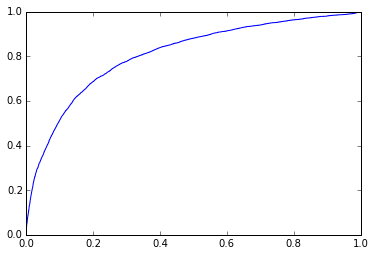

In [214]:
from sklearn import metrics
import matplotlib.pyplot as plt
status =model.predict_proba(train1[imp_features].values)
fpr, tpr, _ = metrics.roc_curve(train1['PREPAID_Y_N'].values, status[:,1])
roc_auc = metrics.auc(fpr, tpr)
print roc_auc
plt.figure()
plt.plot(fpr,tpr)

In [176]:
model.predict_proba(test1[imp_features].values)

array([[ 0.79734185,  0.20265815],
       [ 0.86380913,  0.13619087],
       [ 0.91473402,  0.08526598],
       ..., 
       [ 0.41485223,  0.58514777],
       [ 0.8355772 ,  0.1644228 ],
       [ 0.83977898,  0.16022102]])

In [51]:
model.predict_proba(x_test)

array([[ 0.85540335,  0.14459665],
       [ 0.92592116,  0.07407884],
       [ 0.84805431,  0.15194569],
       ..., 
       [ 0.86948375,  0.13051625],
       [ 0.7492527 ,  0.2507473 ],
       [ 0.92573235,  0.07426765]])

In [52]:
from sklearn import metrics
print metrics.accuracy_score(y_test, model.predict(x_test))

0.83282208589


In [19]:
train1['PREPAID_Y_N']=train1['PREPAID_Y_N'].astype("int")
train1['Bank_Added']=train1['Bank_Added'].astype("int")
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44986 entries, 63967 to 55834
Data columns (total 24 columns):
Cust_id                  44986 non-null int64
cust_engagmnt_seg_key    44986 non-null int64
Acquisition_channel      44986 non-null object
bhvrl_seg_type_key       44986 non-null int64
activity_segment         44986 non-null object
clstr_num                44986 non-null object
engaged_byr_y_n          44986 non-null object
PREPAID_Y_N              44986 non-null int32
gender                   44986 non-null object
mtl_sts_cd               44986 non-null object
income_cd                44986 non-null int64
emailable_flag           44986 non-null int64
Email_open_y_n_3m        44986 non-null int64
Email_open_y_n_6m        44986 non-null int64
Email_open_y_n_12m       44986 non-null int64
TPV_y                    44986 non-null float64
TXN_y                    44986 non-null float64
FMX_CC_y                 44986 non-null float64
FMX_BC_y                 44986 non-null float64

In [21]:
train1.isnull().any()

Cust_id                  False
cust_engagmnt_seg_key    False
Acquisition_channel      False
bhvrl_seg_type_key       False
activity_segment         False
clstr_num                False
engaged_byr_y_n          False
PREPAID_Y_N              False
gender                   False
mtl_sts_cd               False
income_cd                False
emailable_flag           False
Email_open_y_n_3m        False
Email_open_y_n_6m        False
Email_open_y_n_12m       False
TPV_y                    False
TXN_y                    False
FMX_CC_y                 False
FMX_BC_y                 False
FMX_ACH_y                False
FMX_BAL_y                False
CC_Added                 False
Bank_Added               False
cust_age                 False
dtype: bool

In [137]:
from patsy import dmatrices
y,X=dmatrices('PREPAID_Y_N~C(cust_engagmnt_seg_key)+C(Acquisition_channel)\
              +C(bhvrl_seg_type_key)+C(activity_segment)+C(clstr_num)\
              +C(engaged_byr_y_n)+C(gender)+C(mtl_sts_cd)+C(income_cd)\
              +C(emailable_flag)+C(Email_open_y_n_3m)+C(Email_open_y_n_6m)+C(Email_open_y_n_12m)\
              +C(CC_Added)+C(Bank_Added)+C(cust_age)+TPV_y+TXN_y+FMX_CC_y\
              +FMX_BC_y',train1,return_type='dataframe')
print X.columns

ValueError: For numerical factors, num_columns must be an int

Cust_id
2138053927267259561    1
1153611310959672655    0
1527716133818506699    1
1734025596409684745    0
1464402850882574781    0
2161500817158043838    0
1408094626582109613    0
1730860034452992375    0
1242461055918067605    0
2059436750813483078    0
1827389268951835280    0
1272400790360026685    0
1879617958997057806    1
1877433678364568462    0
1717422870287862059    0
1166545861387565599    0
1641649373197731459    0
2097530259310263863    0
2294905925056100072    1
1244522629598262331    1
2128589223746220772    0
1564029217181133124    0
2089048834147497837    0
1739290057131254806    0
1282447196005824163    0
2081942297465779060    0
1838441841983610902    0
1986264621872886059    1
1539438625067535886    0
1712791607697948318    0
                      ..
1449645143013960715    1
1651637011055950045    1
1515590042661308944    0
1709820468121249615    0
2086698061182840578    0
1626576471058497150    0
1683416697174182700    1
2241383003806837323    0
13796242693282255